<a href="https://colab.research.google.com/github/Romeela/Ecommerce-Data/blob/main/Capstone_Project_Ecommerce_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E - Commerce Data Set


Context:

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/content/Train.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [3]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<ipython-input-4-9e584e79357d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)


<Axes: >

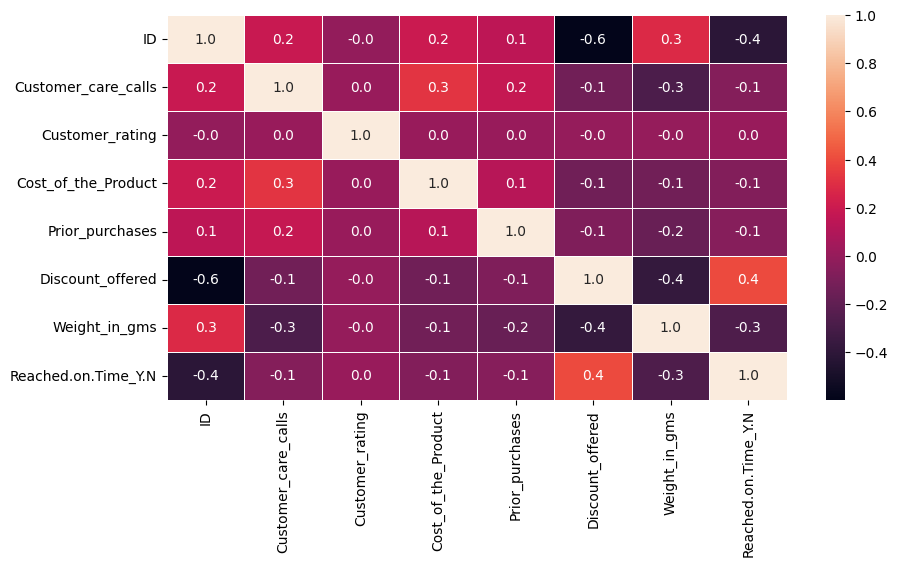

In [4]:
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

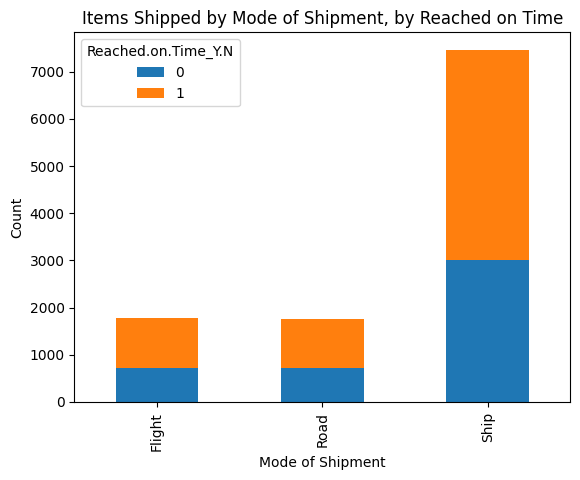

In [5]:
grouped = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Items Shipped by Mode of Shipment, by Reached on Time')
plt.show()

This visualization displays the various methods of shipment that were utilized for delivering the products.
The mode of shipment that was most commonly used to send the products was "Ship", with over 7000 shipments sent through it.
Ship mode had a higher percentage of products that reached their destination on time compared to flight and road modes.

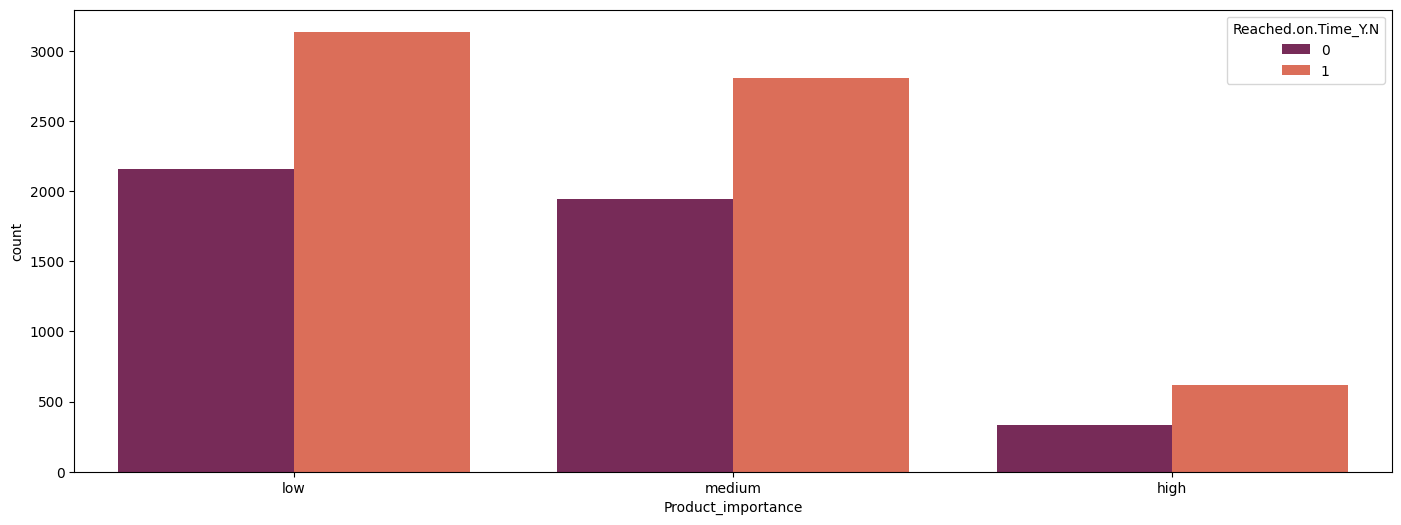

In [6]:
plt.figure(figsize = (17, 6))
sns.countplot(x = 'Product_importance', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

This visualization represents the distribution of products across different order of importance categories - medium, low, and high - and whether they reached their destination on time or not.
The quantity of products categorized as "high importance" was comparatively lower than those categorized as "medium" and "low".
Products that did not reach their destination on time were more numerous than those that did, across all levels of importance.

In [ ]:
import plotly.express as px
warehouse_counts = df['Warehouse_block'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=warehouse_counts, names=warehouse_counts.index, hole=0.5)

# Customize the colors and add labels and title
fig.update_traces(marker=dict(colors=px.colors.sequential.matter_r))
fig.update_traces(textinfo='percent+label')
fig.update_layout(width=650, height=400, title='Warehouse Blocks')

# Show the plot
fig.show()

This graph displays the usage of five warehouse blocks for product storage.
The F block had a greater quantity of stored products than the other blocks.
The remaining blocks have roughly equal quantities of stored products.

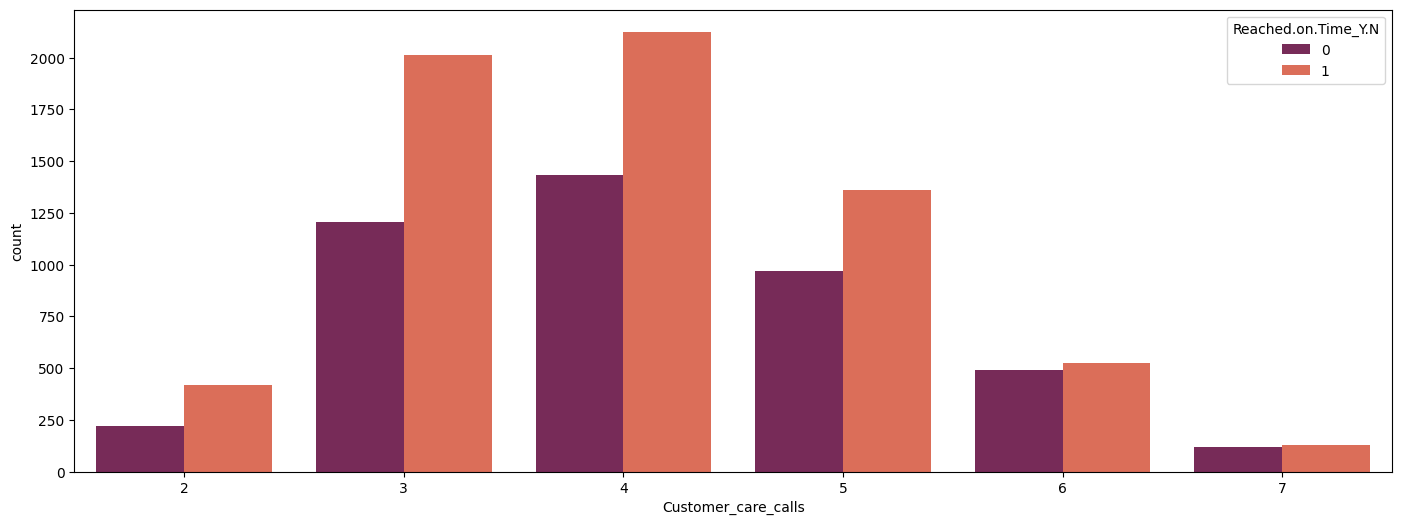

In [ ]:
plt.figure(figsize = (17, 6))
sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

This graph illustrates the correlation between the number of customer care calls and whether or not the deliveries were made on time.
For over 2000 products, the maximum number of calls allowed is 4.
The majority of shipments necessitate inquiries, and typically, there are between 3 to 5 calls made in regards to them.

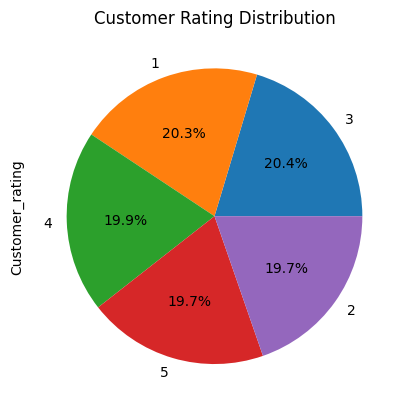

In [ ]:
df['Customer_rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Customer Rating Distribution')
plt.show()

In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [8]:
df.corr()['Reached.on.Time_Y.N'].sort_values()

<ipython-input-8-fe3dbafb93e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Reached.on.Time_Y.N'].sort_values()


ID                    -0.411822
Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

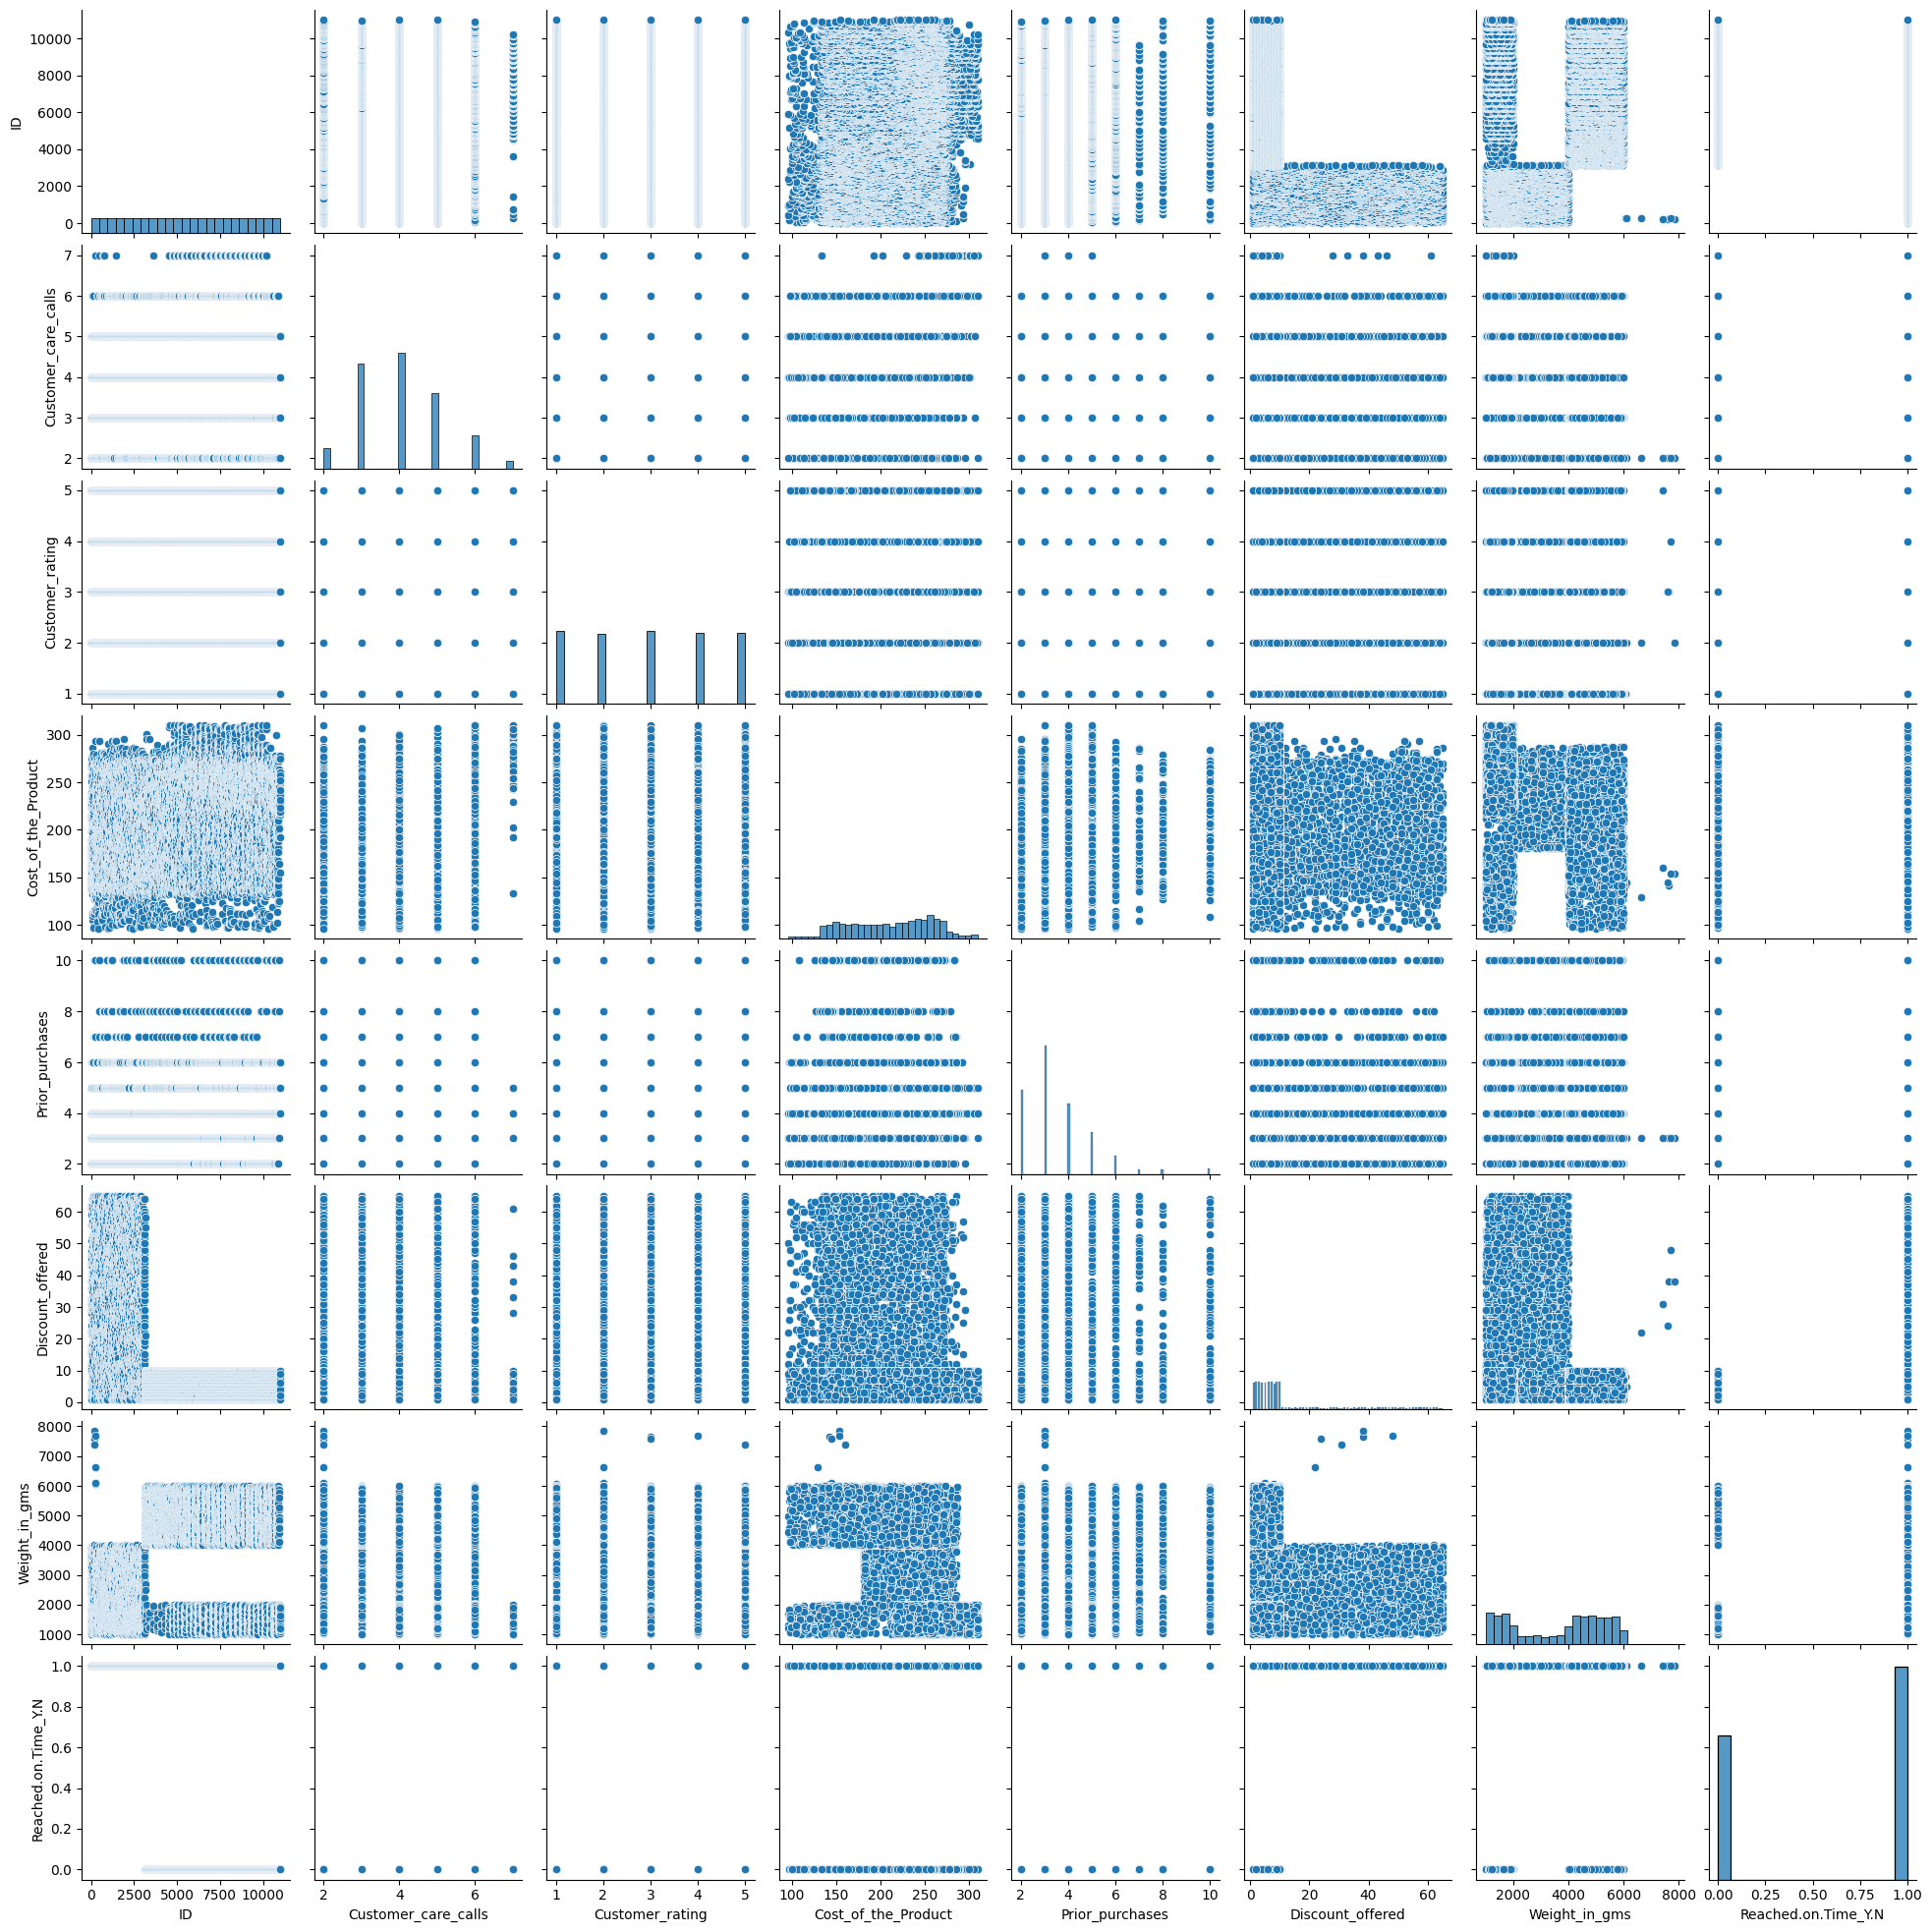

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [13]:
df = df.drop(['ID', 'Gender'], axis=1 )
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


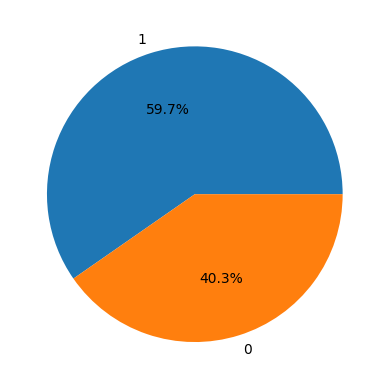

In [14]:
risk_counts = df['Reached.on.Time_Y.N'].value_counts()
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%')

plt.title('')
plt.show()

In [15]:
X = df.drop(['Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

In [16]:
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,44,1233
1,4,0,4,5,216,2,1,59,3088
2,0,0,2,2,183,4,1,48,3374
3,1,0,3,3,176,4,2,10,1177
4,2,0,2,2,184,3,2,46,2484
...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,1,1538
10995,1,2,4,1,232,5,2,6,1247
10996,2,2,5,4,242,5,1,4,1155
10997,4,2,5,2,223,6,2,2,1210


In [17]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled)

       Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0             0.447189         -2.004158            -0.047711   
1             1.118034         -2.004158            -0.047711   
2            -1.565345         -2.004158            -1.799887   
3            -0.894500         -2.004158            -0.923799   
4            -0.223656         -2.004158            -1.799887   
...                ...               ...                  ...   
10994        -1.565345          0.638342            -0.047711   
10995        -0.894500          0.638342            -0.047711   
10996        -0.223656          0.638342             0.828377   
10997         1.118034          0.638342             0.828377   
10998         0.447189          0.638342            -1.799887   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0            -0.700755            -0.690722        -0.372735   
1             1.421578             0.120746        -1.029424   
2            -0.700755     

In [18]:
X = X_scaled
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.447189,-2.004158,-0.047711,-0.700755,-0.690722,-0.372735,-0.548034,1.889983,-1.468240
1,1.118034,-2.004158,-0.047711,1.421578,0.120746,-1.029424,-0.548034,2.815636,-0.333893
2,-1.565345,-2.004158,-1.799887,-0.700755,-0.565881,0.283954,-0.548034,2.136824,-0.159002
3,-0.894500,-2.004158,-0.923799,0.006689,-0.711529,0.283954,1.035735,-0.208162,-1.502484
4,-0.223656,-2.004158,-1.799887,-0.700755,-0.545074,-0.372735,1.035735,2.013404,-0.703244


In [19]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes=np.unique(y_train), 
                                                  y=y_train)

class_weights_dict = dict(enumerate(class_weights))

In [21]:
print(class_weights_dict)

{0: 1.2424456368257555, 1: 0.8367249904906808}


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class_weights = class_weight.compute_sample_weight('balanced', y_train)

gbc_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    subsample=1.0,
    random_state=42
)
gbc_model.fit(X_train, y_train, sample_weight=class_weights)


y_train_pred_gbc = gbc_model.predict(X_train)
y_test_pred_gbc = gbc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_gbc)
test_acc = accuracy_score(y_test, y_test_pred_gbc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6879190817138311
Test accuracy:  0.6918181818181818


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.96      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



In [24]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=42
)

abc.fit(X_train, y_train, sample_weight=class_weights)

y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)
# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6431412660529605
Test accuracy:  0.6472727272727272


In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



In [27]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)


params = {
    'objective': 'binary:logistic',
    #'eval_metric': 'logloss',
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'seed': 42
}
num_rounds = 1000
xgb_model = xgb.train(params, dtrain, num_rounds)

y_train_pred_xgb = xgb_model.predict(dtrain)
y_test_pred_xgb = xgb_model.predict(dtest)

y_train_pred_xgb[y_train_pred_xgb >= 0.5] = 1
y_train_pred_xgb[y_train_pred_xgb < 0.5] = 0

y_test_pred_xgb[y_test_pred_xgb >= 0.5] = 1
y_test_pred_xgb[y_test_pred_xgb < 0.5] = 0

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_xgb)
test_acc = accuracy_score(y_test, y_test_pred_xgb)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.7034890328446415
Test accuracy:  0.6913636363636364


In [28]:
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71       895
           1       0.90      0.54      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.73      0.69      2200
weighted avg       0.77      0.69      0.69      2200

